In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('house_prices.csv')

# Menampilkan beberapa baris pertama dataset
print(data.head())

   Bedrooms  Bathrooms  Sqft_Living   Price
0         3          2         1800  450000
1         4          3         2200  650000
2         2          1         1200  300000
3         3          2         1500  400000
4         4          3         2500  700000


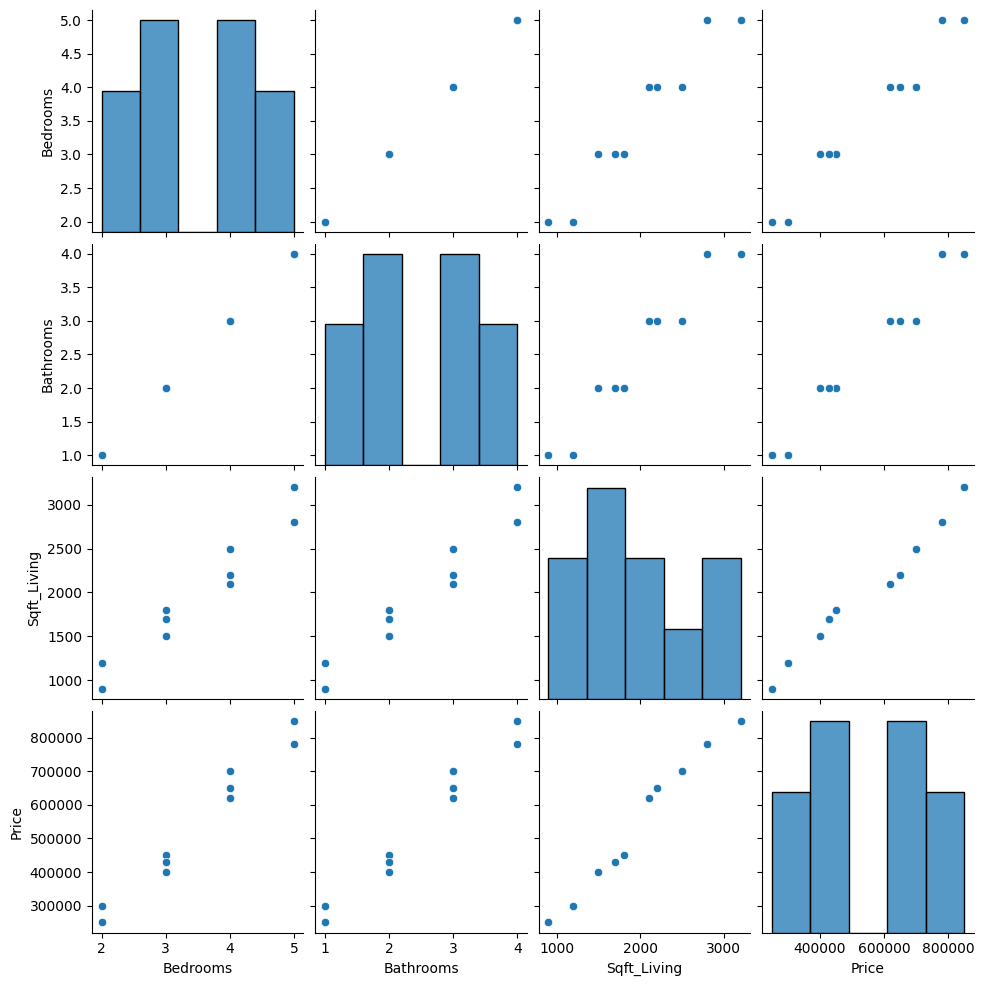

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memvisualisasi hubungan menggunakan pairplot
sns.pairplot(data)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split menjadi data training dan testing
X = data[['Bedrooms', 'Bathrooms', 'Sqft_Living']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Menampilkan parameter model
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')


Intercept: -34732.1428571305
Coefficients: [39732.14285714 39732.14285714   168.75      ]


In [5]:
# Memprediksi harga untuk fitur rumah baru
new_houses = [
    [3, 2, 2000],
    [4, 3, 2500],
    [2, 1, 1200]
]
new_houses_df = pd.DataFrame(new_houses, columns=['Bedrooms', 'Bathrooms', 'Sqft_Living'])
predicted_prices = model.predict(new_houses_df)

# Menampilkan hasil prediksi
for house, price in zip(new_houses, predicted_prices):
    print(f'Bedrooms: {house[0]}, Bathrooms: {house[1]}, Sqft Living: {house[2]}, Predicted Price: ${price:.2f}')


Bedrooms: 3, Bathrooms: 2, Sqft Living: 2000, Predicted Price: $501428.57
Bedrooms: 4, Bathrooms: 3, Sqft Living: 2500, Predicted Price: $665267.86
Bedrooms: 2, Bathrooms: 1, Sqft Living: 1200, Predicted Price: $286964.29


In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 332099011.48
R-squared: 0.99
